In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('complaints.csv')
df.shape

(162421, 3)

df_label = df.Label
df_Text = df.Text

df_1 = pd.concat([df_label, df_Text], axis = 1)

df_1.head()

In [3]:
df['product'].value_counts()

product
credit_reporting       91179
debt_collection        23150
mortgages_and_loans    18990
credit_card            15566
retail_banking         13536
Name: count, dtype: int64

In [4]:
min_value = 13536

credit_reporting = df[df['product'] == 'credit_reporting'].sample(min_value, random_state = 150)
debt_collection = df[df['product'] == 'debt_collection'].sample(min_value, random_state = 150)
mortgages_and_loans = df[df['product'] == 'mortgages_and_loans'].sample(min_value, random_state = 150)
credit_card = df[df['product'] == 'credit_card'].sample(min_value, random_state = 150)
retail_banking = df[df['product'] == 'retail_banking'].sample(min_value, random_state = 150)

In [5]:
df = pd.concat([credit_reporting, debt_collection, mortgages_and_loans, credit_card, retail_banking], axis = 0)
df['product'].value_counts()

product
credit_reporting       13536
debt_collection        13536
mortgages_and_loans    13536
credit_card            13536
retail_banking         13536
Name: count, dtype: int64

In [6]:
df.shape

(67680, 3)

In [7]:
df.sample(10)

,Unnamed: 0,product,narrative
130694,130694,credit_card,payment allocation correct minimum payment dol...
91684,91684,mortgages_and_loans,intrest rate told intrest rate requested autom...
32906,32906,retail_banking,using bridge protect financial information lea...
46827,46827,credit_card,card issued citi month dropped credit limit th...
92475,92475,credit_card,attempted numerous time past almost month get ...
105118,105118,debt_collection,erc received sent debt validation letter sent ...
101670,101670,mortgages_and_loans,servicer united wholesale mortgage submitted r...
3100,3100,credit_card,account statement ending discover three differ...
93721,93721,debt_collection,never owed credit collection company original ...
23828,23828,retail_banking,hello several charge chase account last month ...


In [8]:
df = df[['product', 'narrative']]

In [9]:
df.head()

,product,narrative
52684,credit_reporting,trying get updated info year long one item cre...
160635,credit_reporting,mi last name date birth transunion consumer so...
124138,credit_reporting,since battled credit bureau remove correct sta...
153887,credit_reporting,transunion reporting day late partial account ...
160785,credit_reporting,xxxxdispute xxxxdispute xxxxdispute xxxxdisput...


In [10]:
df['product_map_value'] = df['product'].map({
    'credit_reporting' : 0,       
    'debt_collection' : 1,     
    'mortgages_and_loans' : 2,    
    'credit_card' : 3,  
    'retail_banking' : 4,
})

In [11]:
df.isna().sum()

product              0
narrative            5
product_map_value    0
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.isna().sum()

product              0
narrative            0
product_map_value    0
dtype: int64

In [14]:
df.sample(10)

,product,narrative,product_map_value
56007,mortgages_and_loans,filed discharge loan fedloan keep adding inter...,2
67865,credit_reporting,previously disputed several time account longe...,0
118978,mortgages_and_loans,phh mortgage service acquired loan ocwen advis...,2
158296,mortgages_and_loans,recently use buy pay lot still let rip mentali...,2
162010,credit_card,used cash app purchase item unknown seller tol...,3
58697,credit_reporting,recently discoverd multiple fraudulent account...,0
149989,mortgages_and_loans,left school left lender issued school graduate...,2
63969,debt_collection,learned outstanding collection credit score re...,1
142757,credit_reporting,may concern writing dispute fraudulent charge ...,0
153605,debt_collection,city funding mailed emailed called final dispu...,1


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(df.narrative, df.product_map_value, 
                                                    test_size = 0.2, 
                                                    random_state = 150, 
                                                    stratify=df.product_map_value,
                                                    shuffle = True)

In [16]:
print(f'X_train Shape:- {X_train.shape}')
print(f'X_test Shape:- {X_test.shape}')

X_train Shape:- (54140,)
X_test Shape:- (13535,)


In [17]:
pipe = Pipeline([
    ('TF', TfidfVectorizer()),
    ('KNN', KNeighborsClassifier())
])

In [18]:
pipe.fit(X_train, Y_train)

Pipeline(steps=[('TF', TfidfVectorizer()), ('KNN', KNeighborsClassifier())])

In [19]:
Y_pred = pipe.predict(X_test)

print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78      3122
           1       0.72      0.81      0.76      2430
           2       0.79      0.82      0.80      2580
           3       0.76      0.75      0.76      2741
           4       0.82      0.83      0.82      2662

    accuracy                           0.78     13535
   macro avg       0.78      0.79      0.78     13535
weighted avg       0.79      0.78      0.78     13535



In [20]:
X_test[:10]

10178              ca connect also used work like month ago
34096     writing today regard account kia motor finance...
101143    name date birth social reached regard account ...
55606     filed dispute regard incorrect item credit rep...
55012     disputed account reached many time failed acco...
29675     busy schedule noticed certain debit charge acc...
113693    received credit monitoring alert collection ag...
144766    whomever may concern first foremost submitting...
90951     received offer upgrade hsbc choice checking ac...
93122     using month since use feature called take rema...
Name: narrative, dtype: object

In [21]:
print(Y_test[:10])
print('')
print('''credit_reporting' : 0 | debt_collection' : 1 | mortgages_and_loans' : 2 | credit_card' : 3 | retail_banking' : 4,''')

10178     4
34096     2
101143    1
55606     0
55012     1
29675     4
113693    1
144766    1
90951     4
93122     4
Name: product_map_value, dtype: int64

credit_reporting' : 0 | debt_collection' : 1 | mortgages_and_loans' : 2 | credit_card' : 3 | retail_banking' : 4,


In [159]:
Y_pred[:10]

array([4, 3, 1, 0, 1, 3, 1, 1, 4, 4], dtype=int64)

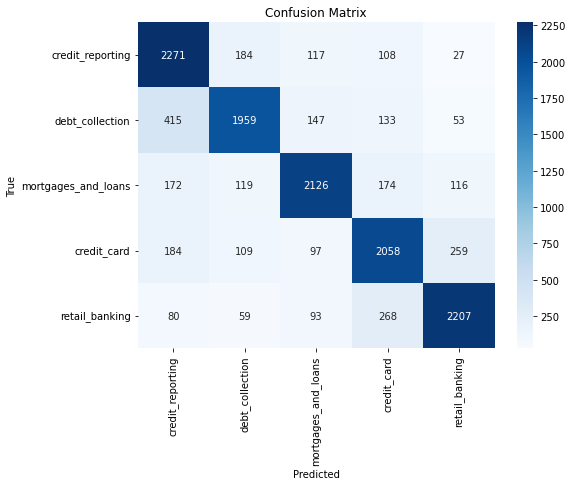

In [34]:
Con = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(Con, annot=True, fmt='d', cmap='Blues', xticklabels=['credit_reporting', 'debt_collection', 'mortgages_and_loans', 'credit_card', 'retail_banking'], yticklabels=['credit_reporting', 'debt_collection', 'mortgages_and_loans', 'credit_card', 'retail_banking'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()